# About Dataset

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

# Columns Descriptions

| Column Name | Description | Details / Values |
| :---------- | :---------- | :--------------- |
| `id`        | Unique identifier for each patient. | Integer |
| `age`       | Age of the patient. | In years |
| `origin`    | Place of study/data collection. | Categorical (e.g., Cleveland, Hungary, Switzerland, Long Beach V) |
| `sex`       | Gender of the patient. | `Male` / `Female` (often encoded as `1` for Male, `0` for Female) |
| `cp`        | Chest pain type. | `typical angina`, `atypical angina`, `non-anginal`, `asymptomatic` |
| `trestbps`  | Resting blood pressure. | In mm Hg on admission to the hospital |
| `chol`      | Serum cholesterol level. | In mg/dl |
| `fbs`       | Fasting blood sugar. | `True` if `fasting blood sugar > 120 mg/dl`, `False` otherwise (often encoded as `1` for True, `0` for False) |
| `restecg`   | Resting electrocardiographic results. | `normal`, `stt abnormality`, `lv hypertrophy` |
| `thalach`   | Maximum heart rate achieved. | Integer |
| `exang`     | Exercise-induced angina. | `True` / `False` (often encoded as `1` for Yes, `0` for No) |
| `oldpeak`   | ST depression induced by exercise relative to rest. | Numeric |
| `slope`     | The slope of the peak exercise ST segment. | `upsloping`, `flat`, `downsloping` |
| `ca`        | Number of major vessels colored by fluoroscopy. | Integer from `0` to `3` |
| `thal`      | Thallium stress test results. | `normal`, `fixed defect`, `reversible defect` |
| `num`       | The predicted attribute: presence of heart disease. | `0` = no heart disease, `1` = presence of heart disease (or higher values for severity in some datasets) |

# Importing Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,r2_score,precision_score,roc_curve,auc
import warnings 
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
df=pd.read_csv('heart_disease_uci.csv')

> getting overview of data

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Exploratory Data Analysis

> Exploring Datatype of each cols

In [5]:
# using df.info() to check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
# checking the data shape of dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 920 rows and 16 columns.


In [7]:
# id col
df['id'].min(),df['id'].max()

(np.int64(1), np.int64(920))

In [8]:
# statistical summary of the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [9]:
df['age'].min(),df['age'].max()

(np.int64(28), np.int64(77))

## output
1. Minimum value of id is 1 and max is 920 means all id are unique.
2. The minimum age is 28 and max is 77.

Text(0.5, 1.0, 'Age Distribution')

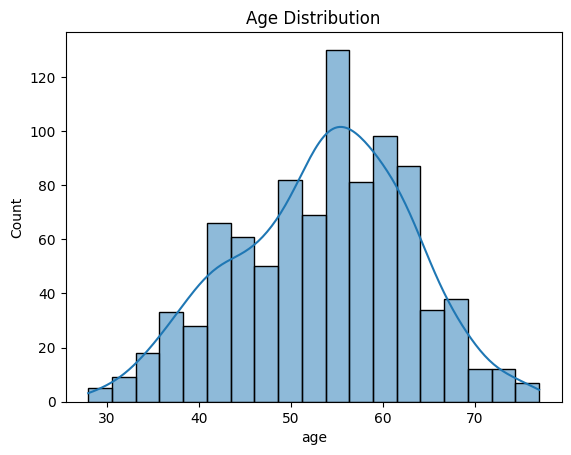

In [10]:
# draw a histogram of the 'age' column to check the distribution of ages
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

Mean 53.51086956521739
Median 54.0
Mode 54


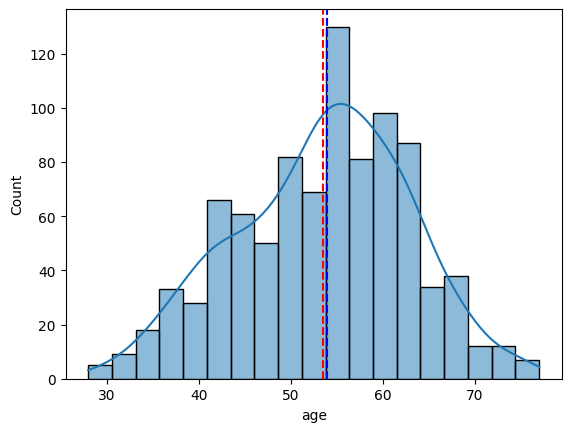

In [11]:
# ploting mean , median and mode of age

sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['age'].median(), color='g', linestyle='--', label='Median')
plt.axvline(df['age'].mode()[0], color='b', linestyle='--', label='Mode')

print("Mean",df['age'].mean())
print("Median",df['age'].median())
print("Mode",df['age'].mode()[0])

Now Checking the distribution of sex col

In [12]:
# now we will check the distribution of the sex column

fig=px.histogram(data_frame=df,x='age',color='sex')

fig.show()

In [13]:
# find values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [14]:
# find value counts of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
        41      7
        49      7
        50      7
        55      7
        58      7
        45      6
        53      6
        57      6
        63      6
        64      6
        52      5
        56      5
        60      5
        37      4
        46      4
        47      4
        61      4
        65      4
        66      4
        35      3
        38      3
        39      3
        42      3
        44      3
        59      3
        67      3
        71      3
        34      2
        30      1
        31      1
        32      1
        33      1
        40      1
        68      1
        69      1
        73      1
        74      1
        76      1
Male    54     36
        58     36
        55     34
        56     33
        57     32
        59     32
        52     31
        53     27
        60     27
        61     27
        62     25
        51     2

In [15]:
# calculate percentage of male and female value counts in the dataset

male_count =726

female_count = 194

total_count=male_count+female_count


# calculate percentage

male_percentage=(male_count/total_count)*100
female_percentage=(female_count/total_count)*100

print(f"The percentage of males in the data {male_percentage:.2f} % and females percentage is {female_percentage:.2f}%")

# difference 

difference_percentage = ((male_count-female_count)/female_count) * 100
print(f"Males are  {difference_percentage:.2f}% more than females in the dataset.")

The percentage of males in the data 78.91 % and females percentage is 21.09%
Males are  274.23% more than females in the dataset.


In [16]:
# lets deal with dataset col

df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

> lets find values count in `dataset` col

In [17]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

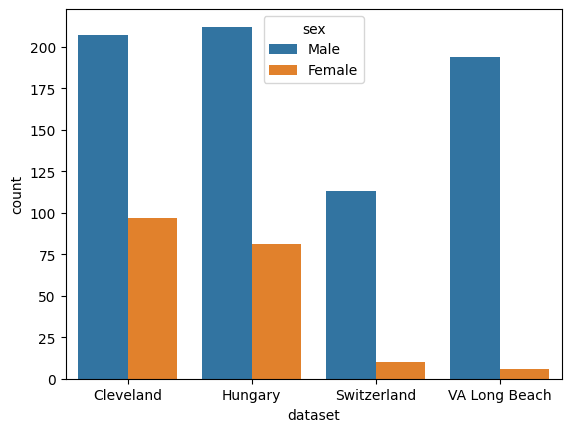

In [18]:
sns.countplot(data=df,x='dataset',hue='sex')


In [19]:
# print the values of dataset column grouped by sex

df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [20]:
# make a plot of age col

fig=px.histogram(data_frame=df,x='age',color='dataset',barmode='group')
fig.show()

> Printing Mean Mode and Median of age col group by dataset Col

In [21]:
print(f"Mean of dataset {df.groupby('dataset')['age'].mean()}")
print(f"Median of dataset {df.groupby('dataset')['age'].median()}")
print(f"Mode of dataset {df.groupby('dataset')['age'].agg(pd.Series.mode)}")

Mean of dataset dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
Median of dataset dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
Mode of dataset dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


# Now Explore Cp (Chest Pain Col)

In [22]:
# value counts of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

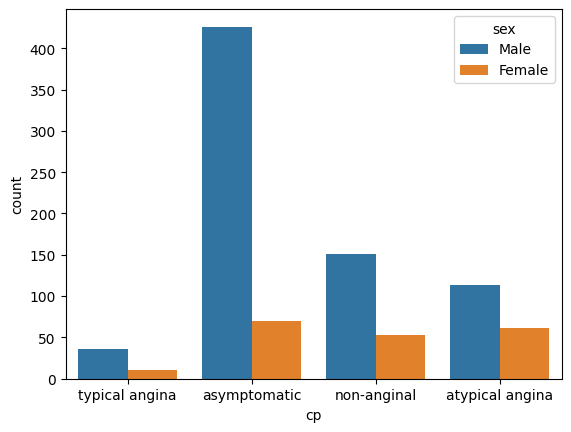

In [23]:
# count plot of cp column by sex
sns.countplot(data=df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

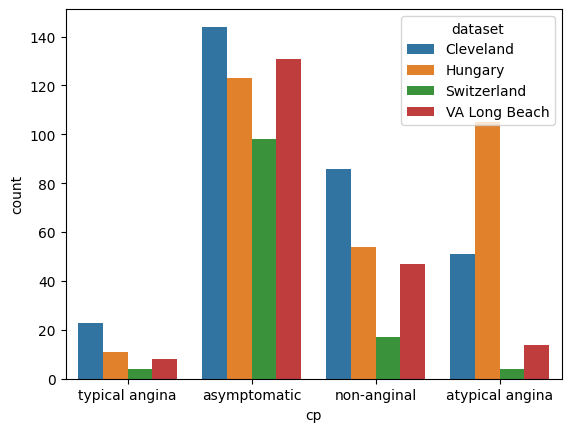

In [24]:
# count plot of cp column by dataset
sns.countplot(data=df,x='cp',hue='dataset')

In [25]:
fig=px.histogram(data_frame=df,x='age',color='cp',barmode='group')
fig.show()

# Lets explore the trestbps ( resting blood pressure ) column

The normal blood pressure is 120/80 mm Hg.  

In [26]:
# finding trestbps value count

df['trestbps'].value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
160.0     50
125.0     29
115.0     19
135.0     18
128.0     17
145.0     16
138.0     15
100.0     15
112.0     14
170.0     14
180.0     12
132.0     12
122.0     12
124.0     12
118.0     10
105.0      9
142.0      9
134.0      9
155.0      8
136.0      8
152.0      7
126.0      7
108.0      7
144.0      6
95.0       6
158.0      4
200.0      4
104.0      3
106.0      3
154.0      3
102.0      3
178.0      3
146.0      3
172.0      2
116.0      2
165.0      2
156.0      2
94.0       2
148.0      2
190.0      2
114.0      2
117.0      1
123.0      1
174.0      1
101.0      1
129.0      1
192.0      1
164.0      1
113.0      1
98.0       1
80.0       1
92.0       1
185.0      1
0.0        1
96.0       1
127.0      1
Name: count, dtype: int64

In [27]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

> Creating histplot of trestbps

<Axes: xlabel='trestbps', ylabel='Count'>

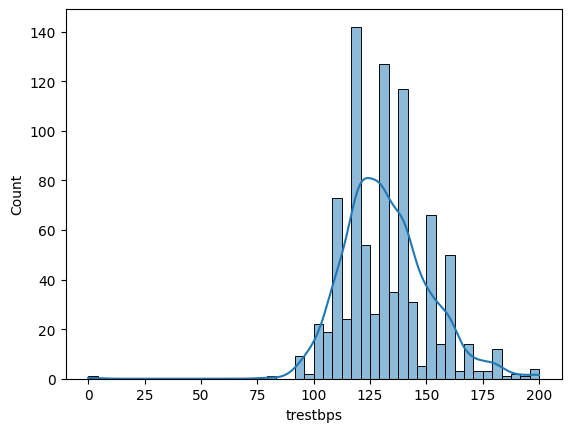

In [28]:
sns.histplot(df['trestbps'], kde=True)

# Dealing With Missing Values 

In [29]:
# percentage of missing values in the trestbps column
df['trestbps'].isnull().mean() * 100

print(f"The percentage of missing values in the trestbps column is {df['trestbps'].isnull().mean() * 100:.2f}%")

The percentage of missing values in the trestbps column is 6.41%


In [30]:
# impute the missing values in the 'trestbps' column using itreative imputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# fit the imputer on the 'trestbps' column
imputer.fit(df[['trestbps']])
# transform the 'trestbps' column
df['trestbps'] = imputer.transform(df[['trestbps']])
# check if there are any missing values in the 'trestbps' column after imputation
print(f"There are {df['trestbps'].isnull().sum()} null values in the 'trestbps' column after imputation.")

There are 0 null values in the 'trestbps' column after imputation.


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [32]:
# impute missing values in chol,ca,oldpeak,thalch, column using iterative imputer
imputer2= IterativeImputer(max_iter=10, random_state=42)

df[['ca','oldpeak','thalch','chol']] = imputer2.fit_transform(df[['ca','oldpeak','thalch','chol']])

In [33]:
# lets impute other columns as well

(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
sex          0.000000
age          0.000000
chol         0.000000
trestbps     0.000000
cp           0.000000
dataset      0.000000
oldpeak      0.000000
thalch       0.000000
ca           0.000000
num          0.000000
dtype: float64

Now impute  `thal` col by using Ml Model

In [34]:
print(f"Percentage of missing values in 'chol' column: {df['thal'].isnull().mean() * 100:.2f}%")

Percentage of missing values in 'chol' column: 52.83%


In [35]:
df['thal'].value_counts().sum()

np.int64(434)

# Missing Value Imputation

In [36]:
df.isnull().sum()[df.isnull().sum() > 0]

fbs         90
restecg      2
exang       55
slope      309
thal       486
dtype: int64

In [37]:
missing_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

> seprating columns based on the datatypes

In [38]:
categorical_cols=['thal','ca','slope','exang','restecg','fbs','cp','sex','num']
bool_cols=['fbs','exang']
numeric_cols=['oldpeak','thalch','chol','trestbps','age']

# Function For Categorical Data

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

def impute_categorical_columns(df, categorical_cols):
    df_imputed = df.copy()
    encoders = {}  # Store label encoders to decode later

    # Step 1: Encode ALL string-type columns (not just the one we're imputing)
    for col in df_imputed.columns:
        if df_imputed[col].dtype == 'object' or col in categorical_cols:
            le = LabelEncoder()
            df_imputed[col] = df_imputed[col].astype(str).fillna("MISSING_VALUE")
            df_imputed[col] = le.fit_transform(df_imputed[col])
            encoders[col] = le

    # Step 2: Impute missing values using RandomForestClassifier
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            null_mask = df[col].isnull()

            X_train = df_imputed.loc[~null_mask].drop(columns=[col])
            y_train = df_imputed.loc[~null_mask, col]

            X_predict = df_imputed.loc[null_mask].drop(columns=[col])

            clf = RandomForestClassifier(n_estimators=100, random_state=42)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_predict)

            df_imputed.loc[null_mask, col] = y_pred

    # Step 3: Optionally decode back to original strings
    for col, le in encoders.items():
        df_imputed[col] = le.inverse_transform(df_imputed[col].astype(int))

    return df_imputed


# Function For Numerical Col

In [40]:
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

def impute_numeric_columns(df, numeric_cols):
    df_imputed = df.copy()
    
    imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=42),
                                max_iter=10,
                                random_state=42)
    
    df_imputed[numeric_cols] = imputer.fit_transform(df_imputed[numeric_cols])
    
    return df_imputed


In [41]:
df = impute_categorical_columns(df, categorical_cols)

# Impute numeric
df = impute_numeric_columns(df, numeric_cols)

In [42]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There are no missing values in the dataset now 

# Dealing With Outliers

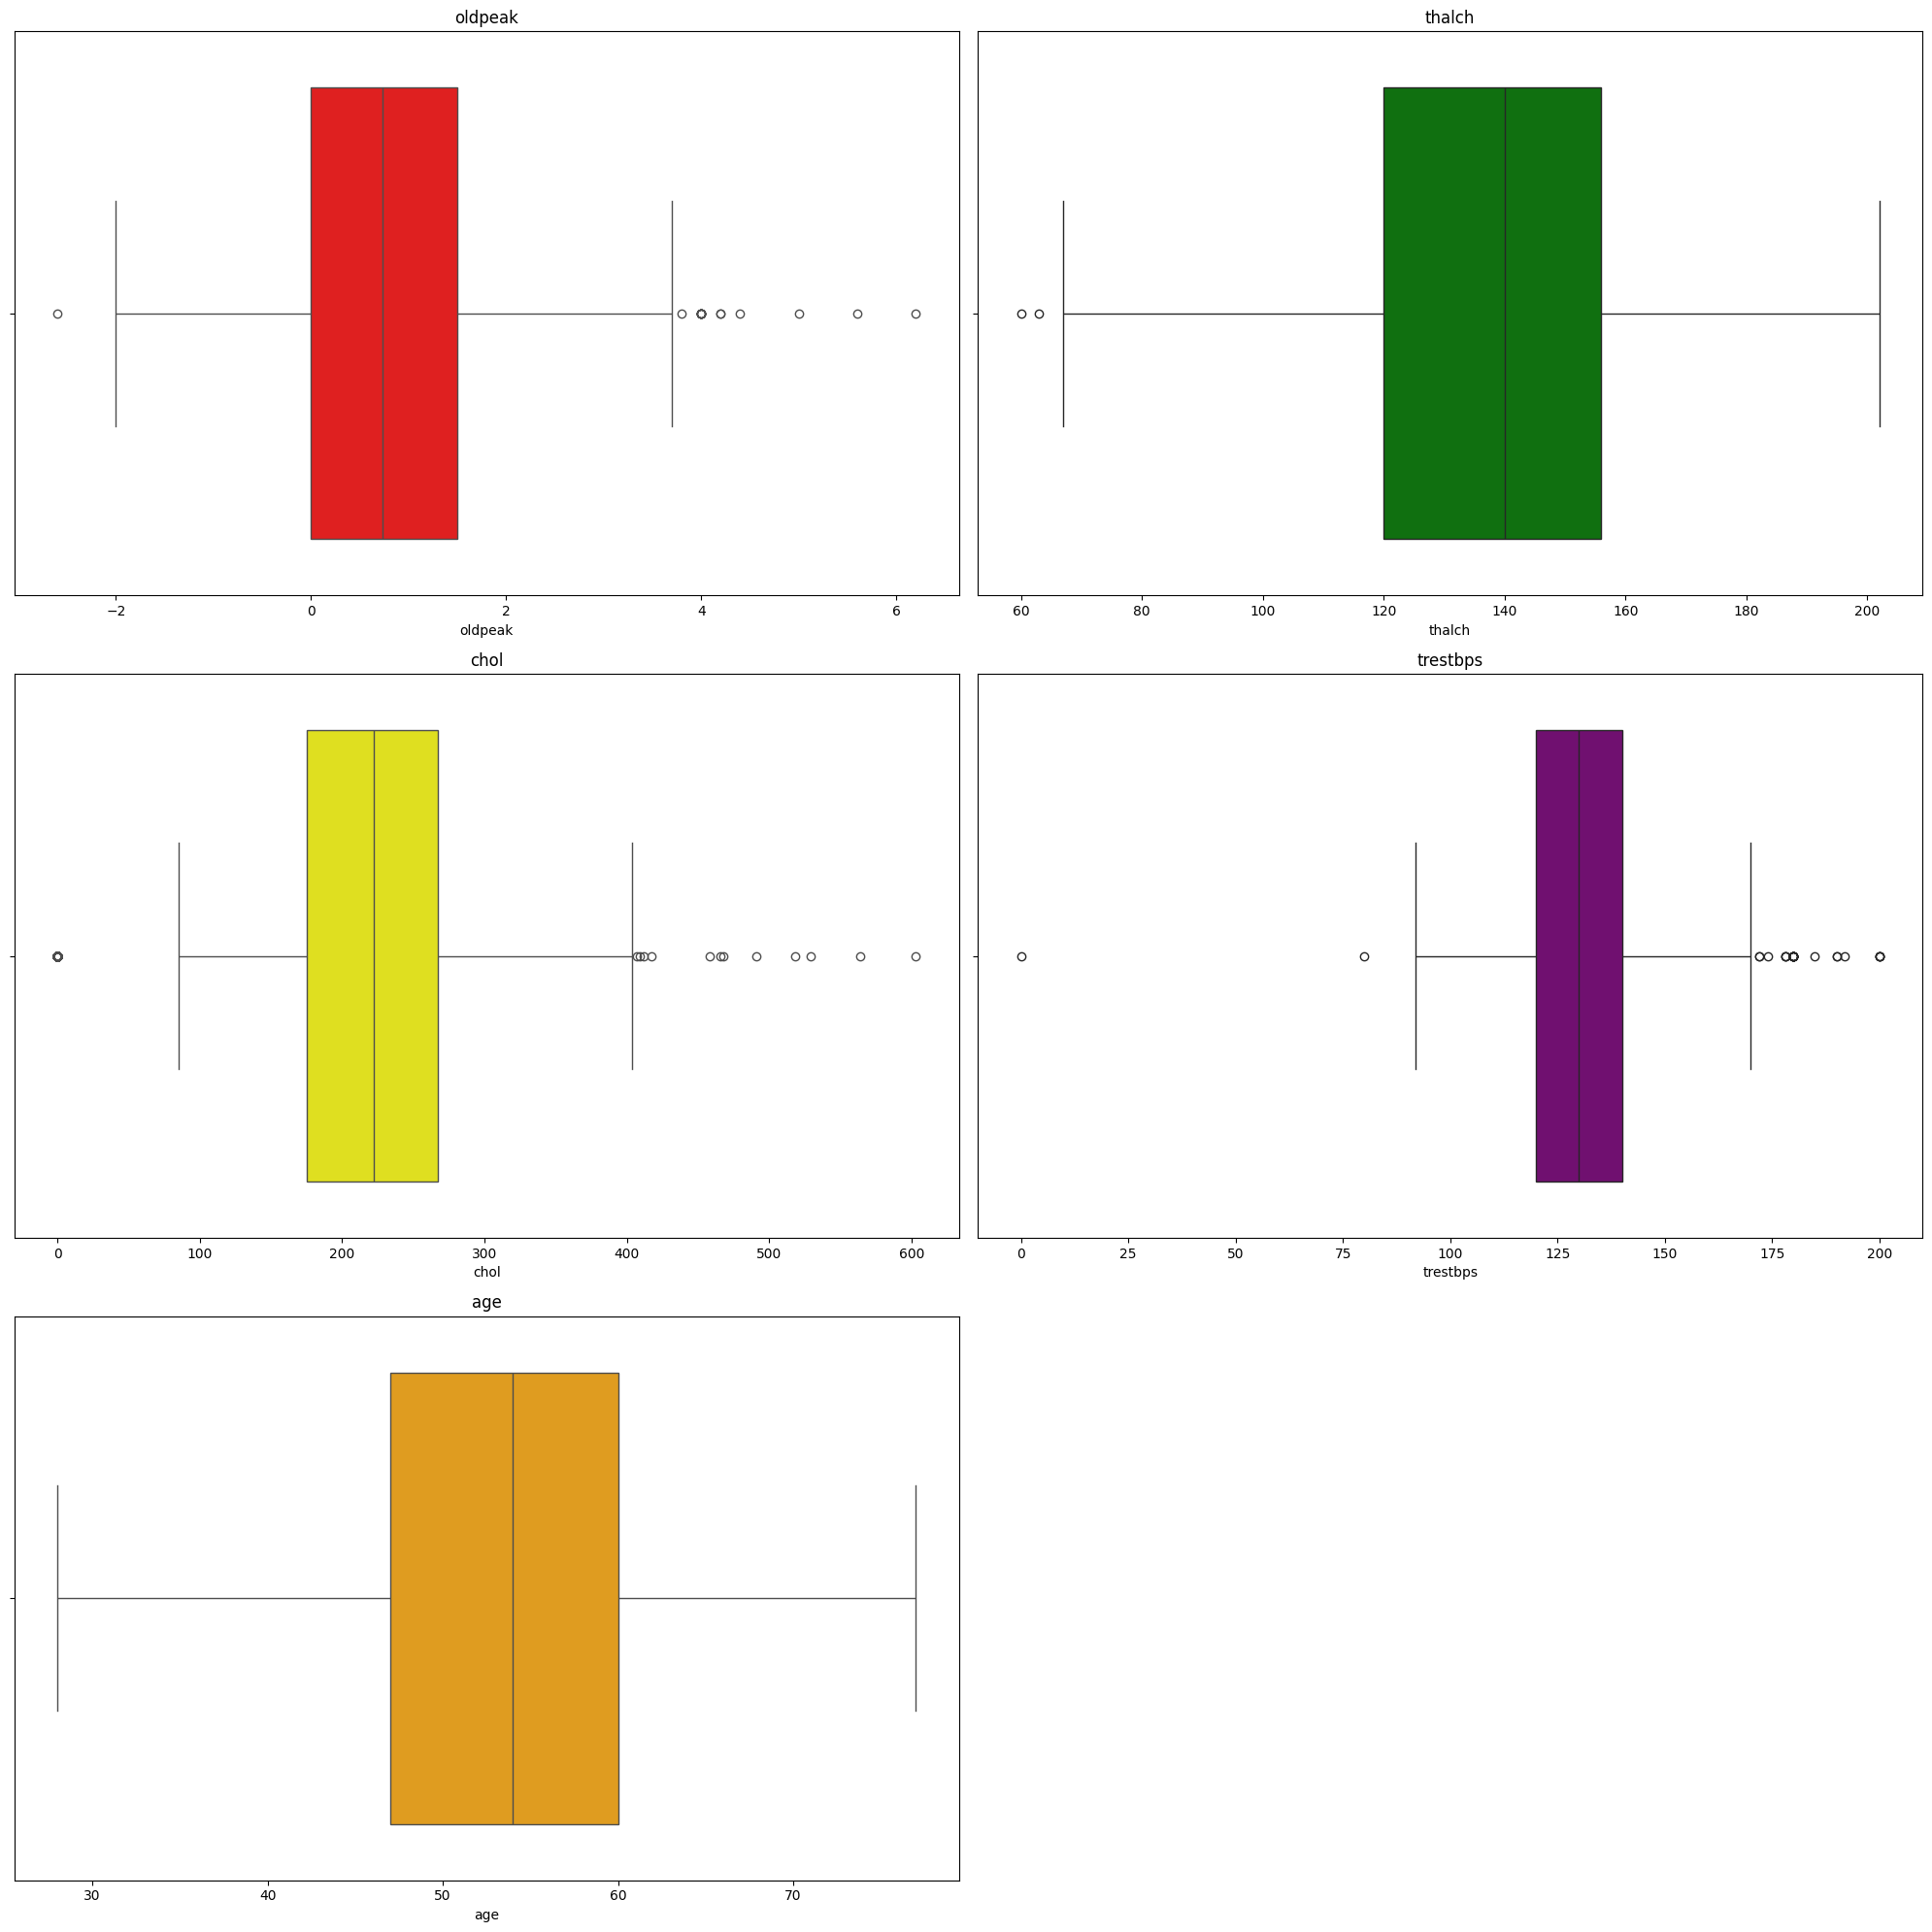

In [43]:
plt.figure(figsize=(20, 20))
colors = ['red', 'green', 'yellow', 'purple', 'orange']
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col], color=colors[i % len(colors)])
    plt.title(col)
plt.tight_layout()

In [44]:
# plotting using ploty

fig=px.box(df,y=numeric_cols,color_discrete_sequence=colors)
fig.update_layout(title='Box Plot of Numeric Columns')
fig.show()


In [45]:
# print the row in df trestbps where the values is 0

df[df['trestbps'] == 0]

# remove the row where trestbps is 0
df = df[df['trestbps'] != 0]

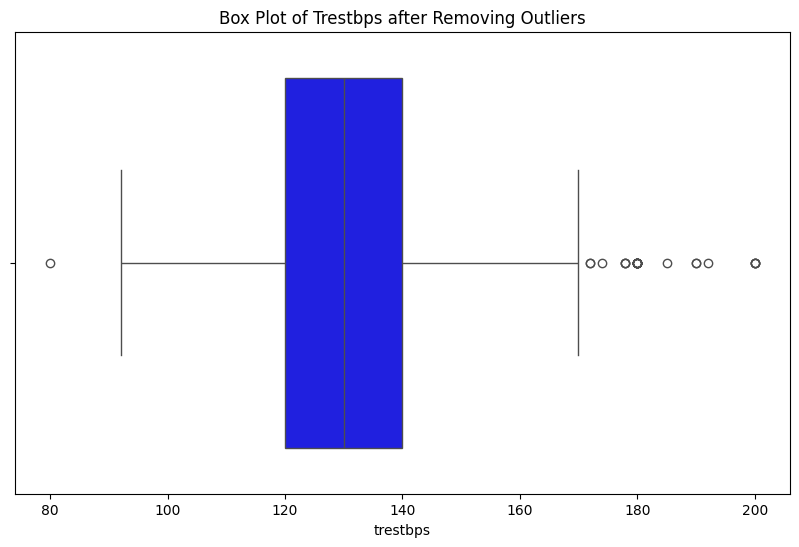

In [46]:
# creating box plot of trestbps using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['trestbps'], color='blue')
plt.title('Box Plot of Trestbps after Removing Outliers')
plt.show()

In [47]:
# print the row where chol is 0
df[df['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32.0,Male,Switzerland,typical angina,95.000000,0.0,False,normal,127.000000,False,0.700000,upsloping,0.5853460993695068,normal,1
598,599,34.0,Male,Switzerland,asymptomatic,115.000000,0.0,False,normal,154.000000,False,0.200000,upsloping,0.28360564053763127,reversable defect,1
599,600,35.0,Male,Switzerland,asymptomatic,132.132404,0.0,False,normal,130.000000,True,0.757452,flat,0.566071261956697,reversable defect,3
600,601,36.0,Male,Switzerland,asymptomatic,110.000000,0.0,False,normal,125.000000,True,1.000000,flat,0.6408606548741755,fixed defect,1
601,602,38.0,Female,Switzerland,asymptomatic,105.000000,0.0,False,normal,166.000000,False,2.800000,upsloping,0.5054215689510466,normal,2
602,603,38.0,Female,Switzerland,asymptomatic,110.000000,0.0,False,normal,156.000000,False,0.000000,flat,0.2407025227929951,normal,1
603,604,38.0,Male,Switzerland,non-anginal,100.000000,0.0,False,normal,179.000000,False,-1.100000,upsloping,-0.10134607814993246,normal,0
604,605,38.0,Male,Switzerland,non-anginal,115.000000,0.0,False,normal,128.000000,True,0.000000,flat,0.488225913936994,reversable defect,1
605,606,38.0,Male,Switzerland,asymptomatic,135.000000,0.0,False,normal,150.000000,False,0.000000,upsloping,0.29374324946670916,normal,2
606,607,38.0,Male,Switzerland,asymptomatic,150.000000,0.0,False,normal,120.000000,True,0.829858,flat,0.6636039287787081,normal,1


In [48]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67.0,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Now Exploring chol Column

In [49]:
# checking the value counts of chol column
df['chol'].value_counts()


chol
0.000000      171
254.000000     10
220.000000     10
211.000000      9
230.000000      9
216.000000      9
223.000000      9
219.000000      9
204.000000      9
240.000000      8
246.000000      8
260.000000      8
243.000000      7
258.000000      7
282.000000      7
197.000000      7
234.000000      7
275.000000      7
213.000000      7
263.000000      7
214.000000      7
203.000000      7
308.000000      6
248.000000      6
270.000000      6
274.000000      6
201.000000      6
245.000000      6
269.000000      6
226.000000      6
236.000000      6
207.000000      6
264.000000      6
186.000000      6
288.000000      6
222.000000      6
198.000000      6
212.000000      6
224.000000      6
233.000000      6
225.000000      6
193.000000      6
196.000000      6
289.000000      6
195.000000      6
237.000000      6
218.000000      6
277.000000      5
298.000000      5
177.000000      5
268.000000      5
250.000000      5
208.000000      5
231.000000      5
221.000000      5
209.0

In [50]:
avg_chol_by_age_num = df.groupby(['age', 'num'])['chol'].mean().reset_index()

import plotly.express as px

fig = px.line(
    avg_chol_by_age_num,
    x='age',
    y='chol',
    color='num',
    markers=True,
    labels={'chol': 'Average Cholesterol', 'age': 'Age', 'num': 'Heart Disease Presence'},
    title='Average Cholesterol Rate by Age and Heart Disease Presence'
)
fig.update_layout(height=500, width=800)
fig.show()

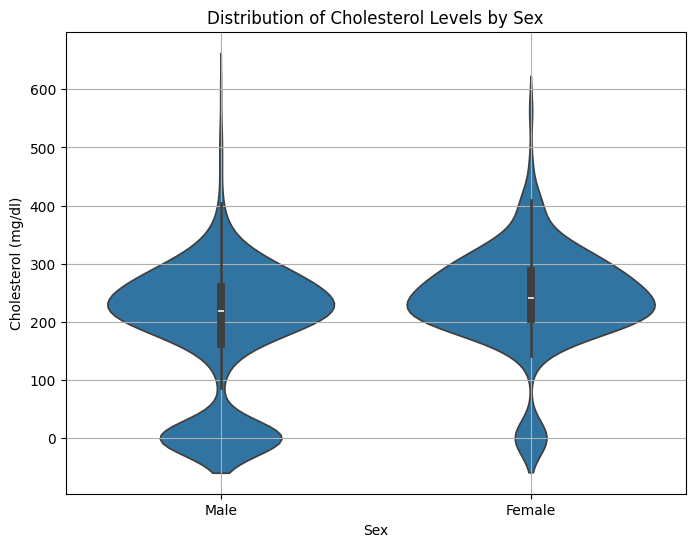

In [51]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='chol', data=df)

plt.title('Distribution of Cholesterol Levels by Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol (mg/dl)')
plt.grid(True)
plt.show()

In [52]:
# frequency of heart disease presence (num) using plotly express

fig = px.histogram(
    df,
    x='num',
    color='num',
    labels={'num': 'Heart Disease Presence'},
    title='Frequency of Heart Disease Presence (num)'
)
fig.update_layout(height=400, width=600, showlegend=False)
fig.show()

In [53]:
# frequency of chal using plotly express

import plotly.express as px

fig = px.histogram(
    df,
    x='ca',
    color='ca',
    labels={'ca': 'Number of Major Vessels (ca)'},
    title='Frequency of Number of Major Vessels (ca)'
)
fig.update_layout(height=400, width=600, showlegend=False)
fig.show()

# Now Doing Predictions

The target col is `num` which is the predicted attribute. We will use this col to predict the heart disease, The unique values in the columns are [0,1,2,3,4] which state that there are 5 types of heart disease.

+ 0 = no heart disease
+ 1 = mild heart disease
+ 2 = moderate heart disease
+ 3 = severe heart disease
+ 4 = critical heart disease

# Using Decision Tree Classifier

Accuracy: 0.62


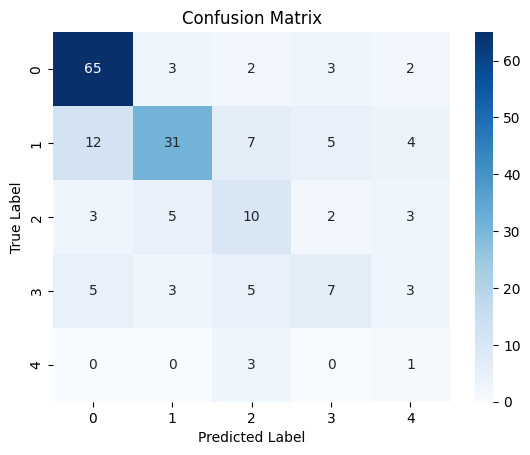


Top Important Features:
     Feature  Importance
0         id    0.363246
13        ca    0.127314
9     thalch    0.083970
5   trestbps    0.081652
1        age    0.077978
11   oldpeak    0.069112
6       chol    0.052110
4         cp    0.040719
8    restecg    0.028750
14      thal    0.025595
12     slope    0.018921
7        fbs    0.017656
10     exang    0.011488
2        sex    0.001490
3    dataset    0.000000


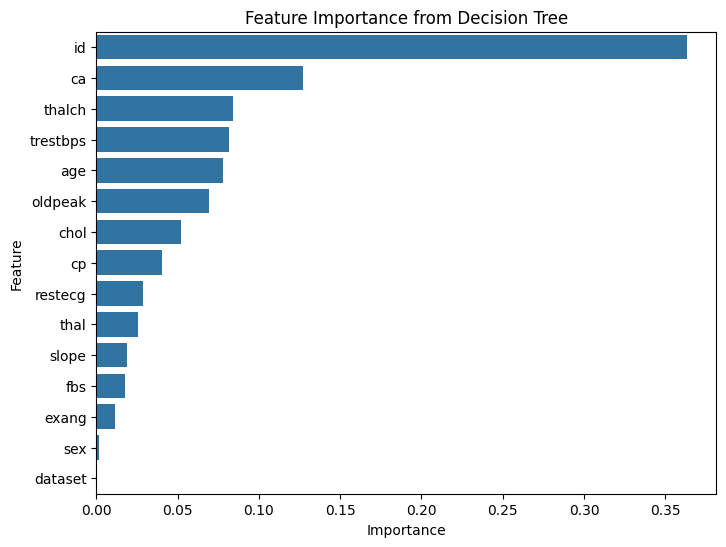

Decision Tree model saved successfully as 'decision_tree_model.pkl'


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


# --------------------------
# 2. Preprocessing (Your Code)
# --------------------------
X = df.drop(columns=['num'], axis=1)
y = df['num']

label = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label.fit_transform(X[col])
    else:
        pass

# --------------------------
# 3. Train-Test Split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# 4. Train Decision Tree
# --------------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# --------------------------
# 5. Predictions & Accuracy
# --------------------------
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# --------------------------
# 6. Confusion Matrix
# --------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# --------------------------
# 7. ROC Curve (for binary classification only)
# --------------------------
if len(y.unique()) == 2:
    y_prob = dt_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# --------------------------
# 8. Feature Importance
# --------------------------
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Important Features:")
print(feature_importance_df)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Decision Tree')
plt.show()

# --------------------------
# 9. Save Model
# --------------------------
joblib.dump(dt_model, "decision_tree_model.pkl")
print("Decision Tree model saved successfully as 'decision_tree_model.pkl'")


# Using Logistic Regression

Accuracy: 0.52


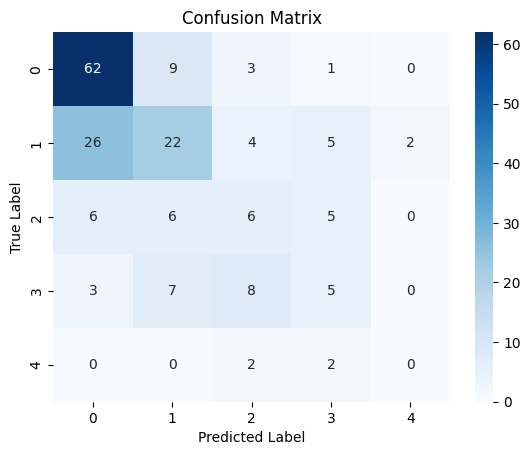


Top Important Features:
                      Feature  Coefficient
7             dataset_Hungary     0.773288
11             cp_non-anginal     0.720664
6                    sex_Male    -0.664396
10         cp_atypical angina     0.645487
3                        chol    -0.497274
17                 slope_flat    -0.473308
5                     oldpeak    -0.447990
16                 exang_True    -0.438731
12          cp_typical angina     0.397414
587    thal_reversable defect    -0.370600
19                     ca_0.0     0.370204
9       dataset_VA Long Beach     0.362556
584                    ca_2.0    -0.324180
483                    ca_1.0    -0.301344
192     ca_0.6031474883967078    -0.295215
2                    trestbps    -0.271106
4                      thalch     0.260508
518     ca_1.0785210191965038     0.241981
35      ca_0.2407025227929951    -0.238075
582     ca_1.5918464757663924     0.237347
556      ca_1.190501633063707     0.236971
347     ca_0.7833785433133155

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import joblib

# --------------------------
# 1. Load and preprocess data
# --------------------------  # Load dataset

X = df.drop('num', axis=1)
y = df['num']

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------
# 2. Train Logistic Regression
# --------------------------
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# --------------------------
# 3. Predictions & Accuracy
# --------------------------
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# --------------------------
# 4. Confusion Matrix
# --------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# --------------------------
# 5. ROC Curve (binary only)
# --------------------------
if len(y.unique()) == 2:
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# --------------------------
# 6. Important Features
# --------------------------
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop Important Features:")
print(feature_importance)

# --------------------------
# 7. Save Model & Scaler
# --------------------------
joblib.dump(model, "heart_disease_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved successfully!")


### Output:

1. The minimum age to have a haeart disease strats from 28 years old.
2. Most people get heart disease at the age between 53 - 54 years.
3. Most of the Males and females suffer with heart disease at the age of 54 - 55 years.
4. The percentage of males in the data 78.91 % and females percentage is 21.09%
5. Males are  274.23% more than females in the dataset.
6. We have highest Number of people from Cleveland (304) and lowest from Switzerland 123.
7. The highest number of females in the dataset are Cleveland(97) & lowest Switzerland(6).
8. The highest number of males are from Hungary (212) and lowest from Switzerland(113).
9. The highest number of males experience asymptomatic angina.
10. Females also experience asymptomatic agenina.
11. The highest aggina pain is asymptomatic reported mostly in Cleveland followed by on second is VA Long Beach and least in Switzerland.
12. Both Male and Females faces asymptomatic aengina at the age between 56 - 57 with reported 47 cases.
13. Removed Outlier from trestbps where its value was 0.
14. We didnt remove the outliers where value of chol(cholesterol) is 0 bcz it is not an outlier.
15. The trestbps and chol have very close relationship between them as observed using scatter plot.
16. Using the Decision Tree the accuracy is 0.62% and using logistic regression it gives 50% accurcy.
